In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
from scipy import stats
from scipy.stats import norm, skew #for some statistics

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [4]:
os.chdir('C:\\Users\\sumit\\Downloads\\graduate-admissions')

In [6]:
%pwd%

'C:\\Users\\sumit\\Downloads\\graduate-admissions'

In [162]:
Admission_test = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [163]:
Admission_test.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [164]:
Admission_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [165]:
print ("Size of train data : {}" .format(Admission_test.shape)) 

Size of train data : (500, 9)


In [166]:
Admission_test.columns= [phrase.strip().replace(' ', '_') for phrase in Admission_test.columns]
Admission_test.head(5)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [167]:
Admission_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial_No.           500 non-null int64
GRE_Score            500 non-null int64
TOEFL_Score          500 non-null int64
University_Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance_of_Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


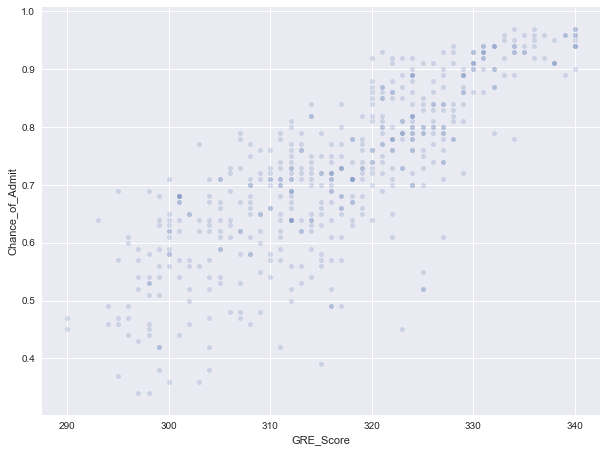

In [168]:
Admission_test.plot(kind='scatter', x='GRE_Score', y='Chance_of_Admit', alpha=0.2)

In [169]:
pandas_profiling.ProfileReport(Admission_test)

Number of variables,9
Number of observations,500
Total Missing (%),0.0%
Total size in memory,35.2 KiB
Average record size in memory,72.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


# Handling Outliers

In [170]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

Admission_test=Admission_test.apply(lambda x: outlier_capping(x))

In [171]:
Admission_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial_No.,500.0,250.500000,144.379634,5.9900,125.7500,250.50,375.25,495.0100
GRE_Score,500.0,316.499900,11.236852,294.9900,308.0000,317.00,325.00,340.0000
TOEFL_Score,500.0,107.209900,6.042629,94.9900,103.0000,107.00,112.00,120.0000
University_Rating,500.0,3.114000,1.143512,1.0000,2.0000,3.00,4.00,5.0000
SOP,500.0,3.374000,0.991004,1.0000,2.5000,3.50,4.00,5.0000
LOR,500.0,3.485000,0.923027,1.5000,3.0000,3.50,4.00,5.0000
CGPA,500.0,8.577201,0.599951,7.2797,8.1275,8.56,9.04,9.8204
Research,500.0,0.560000,0.496884,0.0000,0.0000,1.00,1.00,1.0000
Chance_of_Admit,500.0,0.721919,0.140342,0.3799,0.6300,0.72,0.82,0.9600


# Correlation Analysis

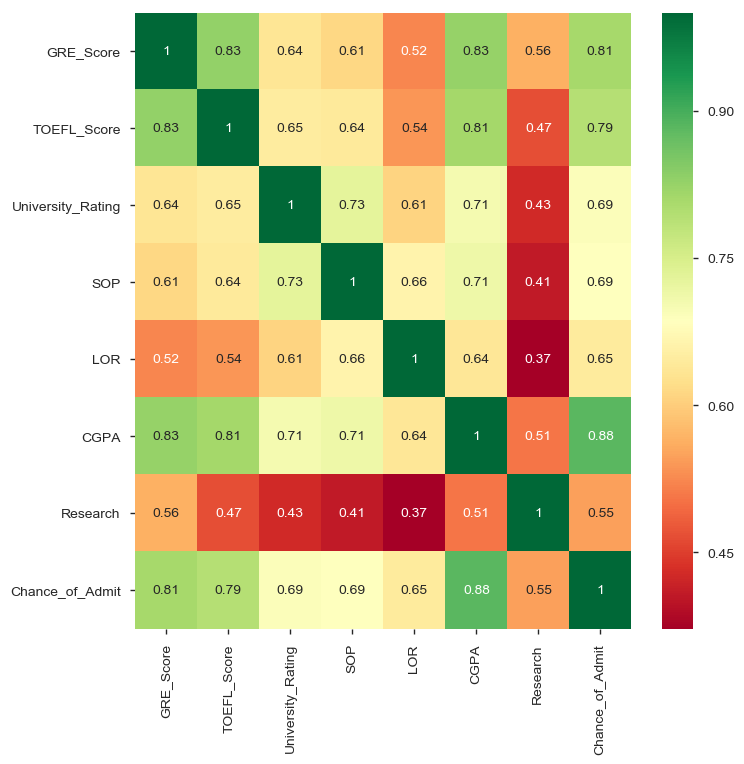

In [172]:
### most correlated features
corrmat = Admission_test.corr()
top_corr_features = corrmat.index[abs(corrmat["Chance_of_Admit"])>0.5]
plt.figure(figsize=(8,8))
g = sns.heatmap(Admission_test[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#correaltion charts

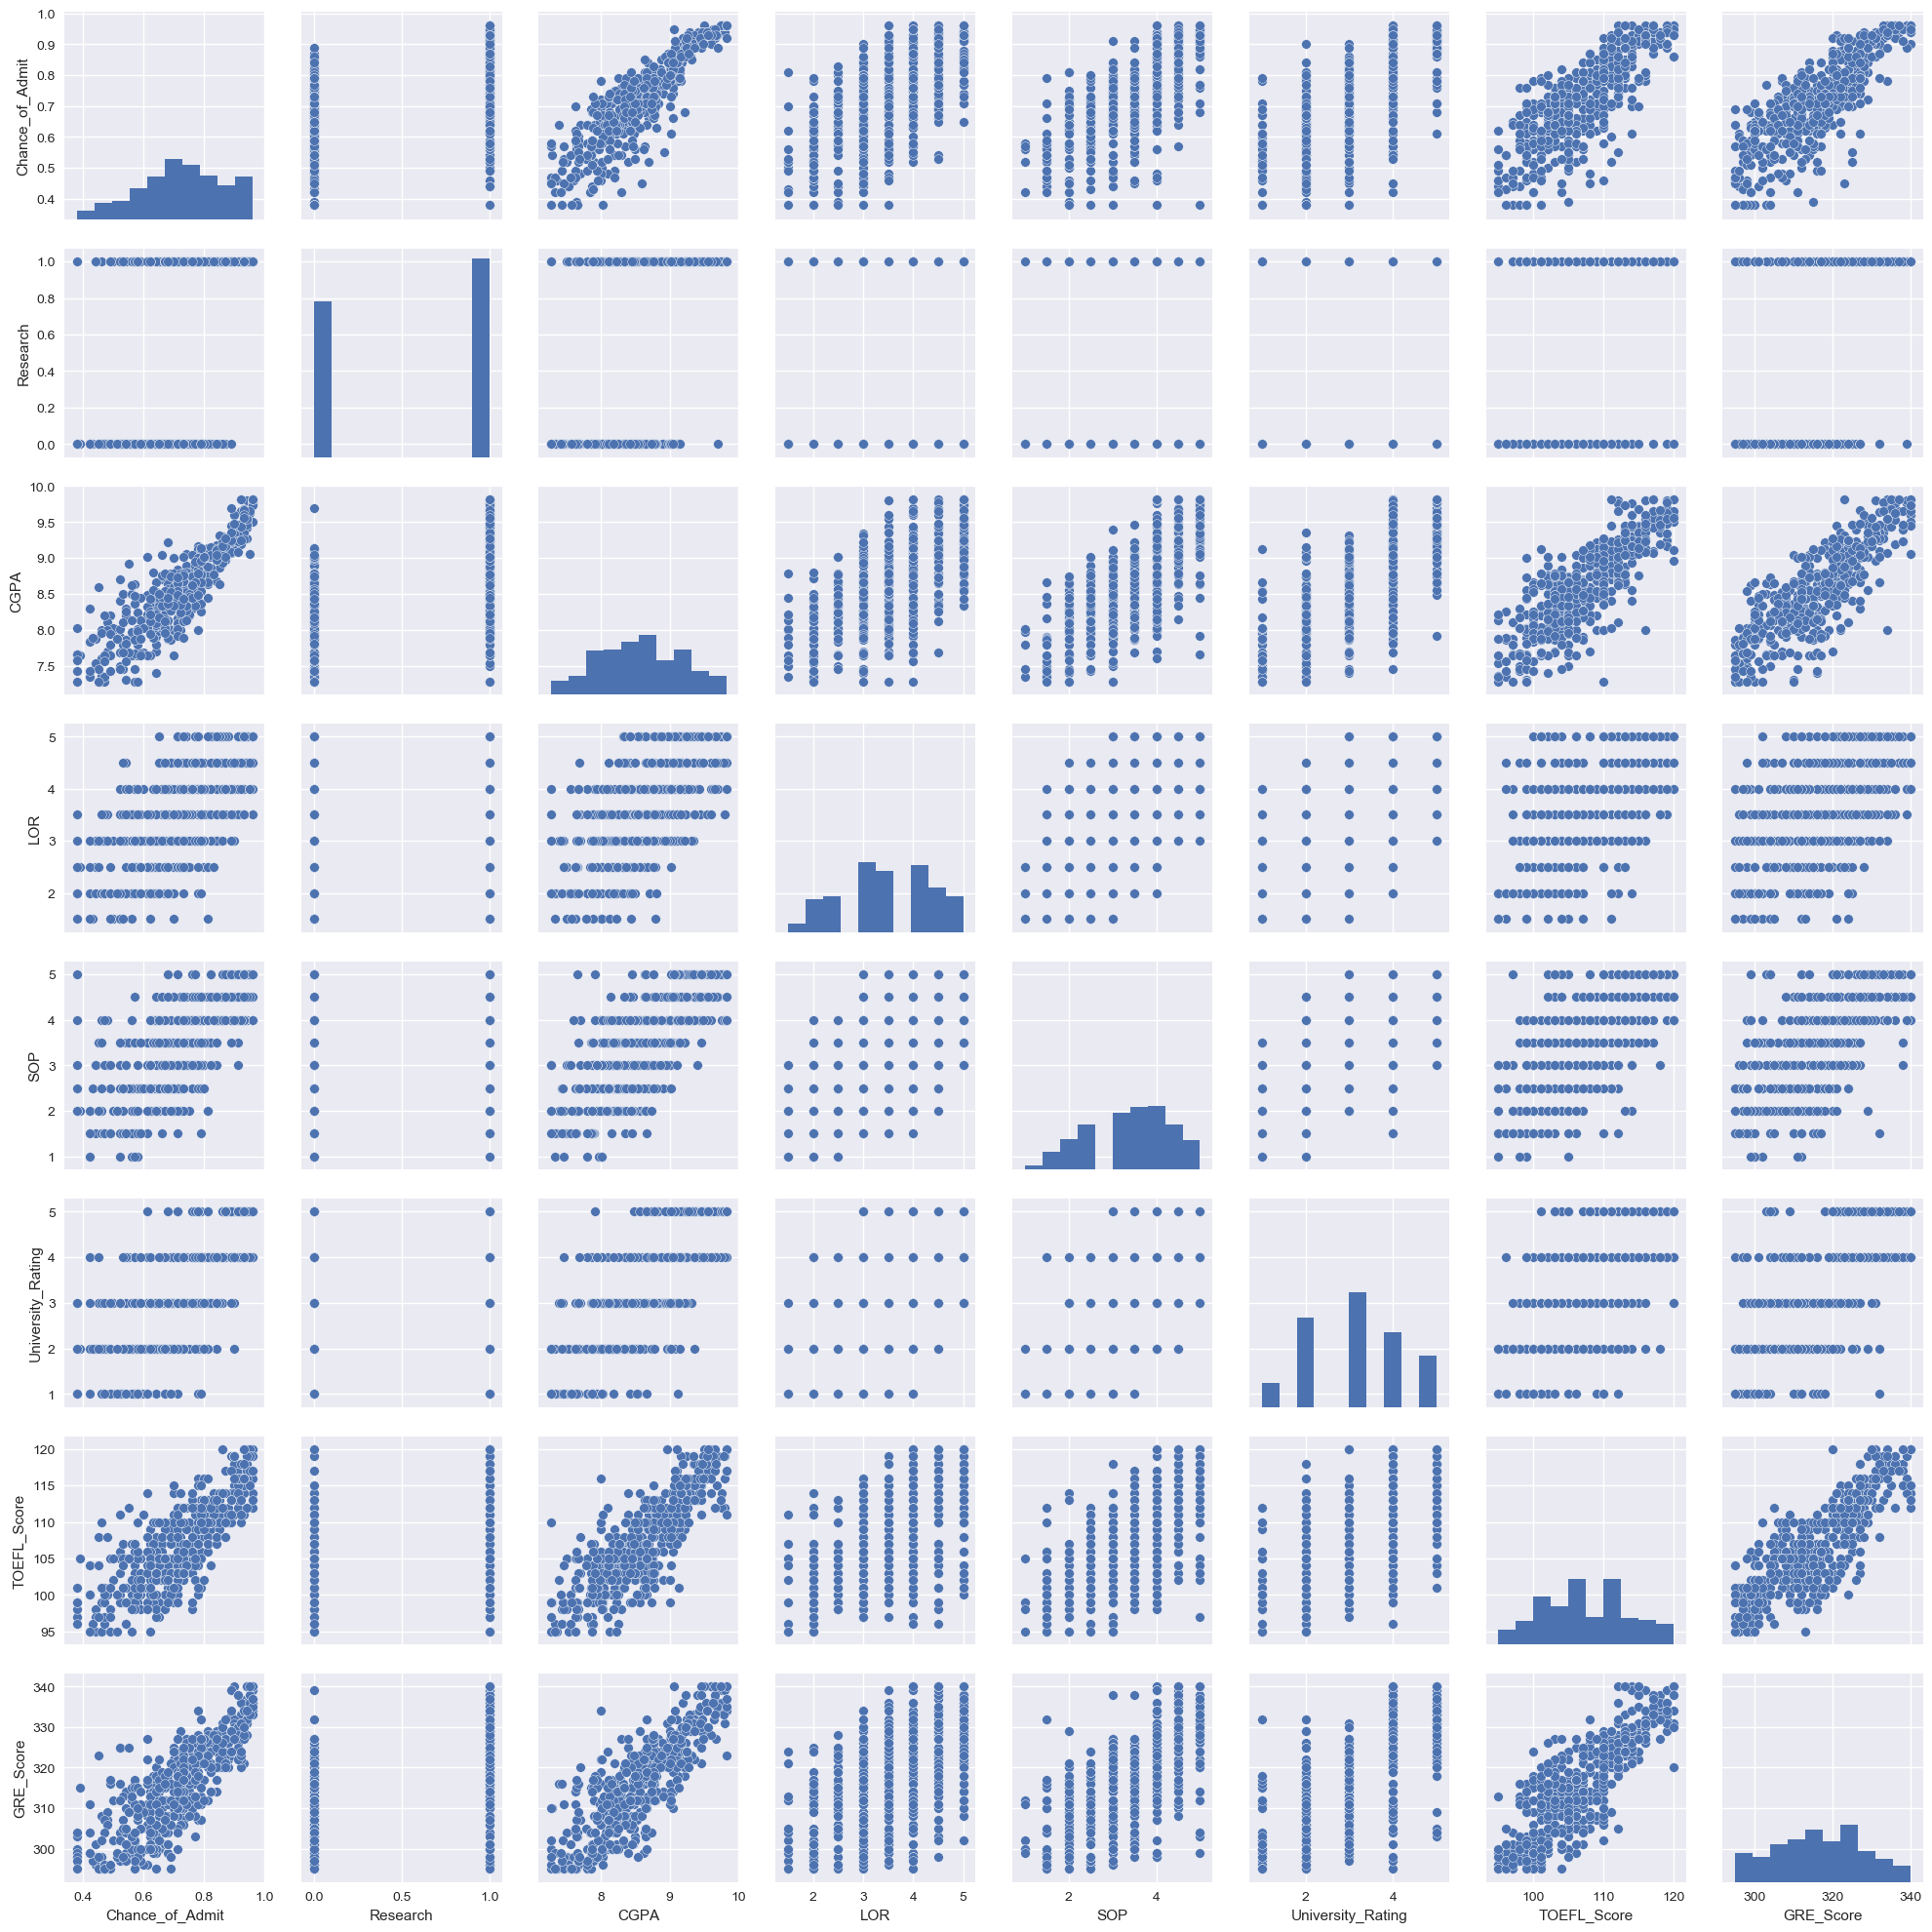

In [173]:
sns.set()
cols = ['Chance_of_Admit', 'Research', 'CGPA', 'LOR', 'SOP', 'University_Rating', 'TOEFL_Score', 'GRE_Score']
sns.pairplot(Admission_test[cols], size = 2.5)
plt.show();


 mu = 0.72 and sigma = 0.14



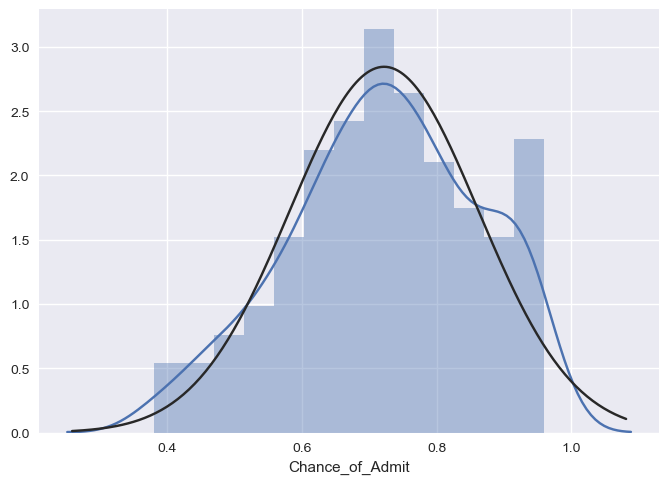

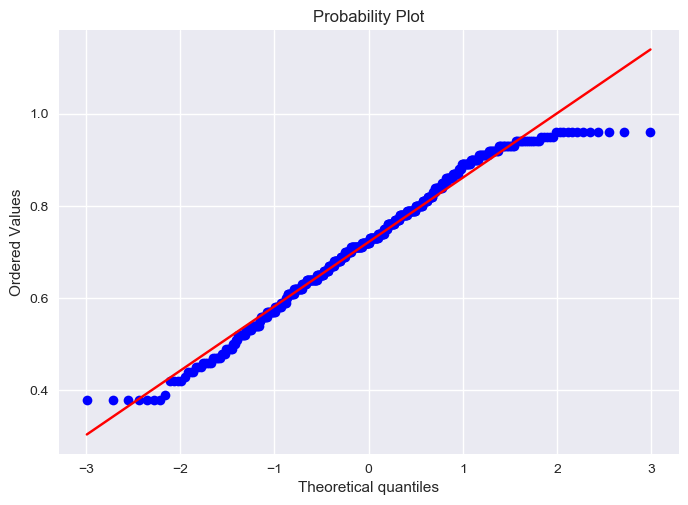

In [174]:
def check_skewness(col):
    sns.distplot(Admission_test[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(Admission_test[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(Admission_test[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness("Chance_of_Admit")

In [175]:
#Splitting the data
feature_columns = Admission_test.columns.difference( ['Chance_of_Admit','SOP'] )
feature_columns

Index(['CGPA', 'GRE_Score', 'LOR', 'Research', 'Serial_No.', 'TOEFL_Score',
       'University_Rating'],
      dtype='object')

In [176]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( Admission_test[feature_columns],
                                                  Admission_test['Chance_of_Admit'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [177]:
print(len( train_X ))
print(len( test_X))

350
150


# Bulilding a Linear Regression Model. 

In [178]:
import statsmodels.api as sm

In [179]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [180]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     237.2
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          4.22e-127
Time:                        12:12:39   Log-Likelihood:                 507.29
No. Observations:                 350   AIC:                            -998.6
Df Residuals:                     342   BIC:                            -967.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4362      0.12

In [181]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const               -1.436181
CGPA                 0.113296
GRE_Score            0.002312
LOR                  0.015530
Research             0.022338
Serial_No.           0.000087
TOEFL_Score          0.003312
University_Rating    0.003764
dtype: float64
R2:  0.8292009212655125


# Method -2 

In [182]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(Admission_test,test_size=0.3,random_state = 123 ) 

In [185]:
#=Dropping Serial No it is not providing any insight
#Save the 'Id' column
train_Serial = train['Serial_No.']
test_Serial = test['Serial_No.']


#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Serial_No.", axis = 1, inplace = True)
test.drop("Serial_No.", axis = 1, inplace = True)


In [186]:
train.head(5)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
211,328.0,110.0,4.0,5.0,4.0,9.14,1.0,0.82
52,334.0,116.0,4.0,4.0,3.0,8.00,1.0,0.78
178,309.0,108.0,3.0,2.5,3.0,8.12,0.0,0.72
336,319.0,110.0,3.0,3.0,2.5,8.79,0.0,0.72
201,315.0,110.0,2.0,3.5,3.0,8.46,1.0,0.72


In [187]:
train.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [188]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [189]:
all_columns = "+".join(train.columns.difference( ['Chance_of_Admit'] ))

print(all_columns)

my_formula = "Chance_of_Admit~" + all_columns

print(my_formula)

CGPA+GRE_Score+LOR+Research+SOP+TOEFL_Score+University_Rating
Chance_of_Admit~CGPA+GRE_Score+LOR+Research+SOP+TOEFL_Score+University_Rating


In [190]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula, data=train).fit()

In [191]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     224.0
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.33e-123
Time:                        12:14:26   Log-Likelihood:                 499.02
No. Observations:                 350   AIC:                            -982.0
Df Residuals:                     342   BIC:                            -951.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3924      0.124    -11.208      0.000      -1.637      -1.148
CGPA                  0.1129      0.011      9.954      0.000       0.091       0.135
GRE_Score             0.0024      0.001      3.971      0.000       0.001       0.004
LOR                   0.0159      0.005      3.359      0.001       0.007       0.025
Research              0.0231      0.008      3.081      0.002       0.008       0.038
SOP                   0.0014      0.005      0.256      0.798      -0.009       0.012
TOEFL_Score           0.0027      0.001      2.700      0.007       0.001       0.005
University_Rating     0.0038      0.004      0.838      0.403      -0.005       0.013
==============================================================================
Omnibus:                       63.340   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.420
Skew:                          -0.995   Prob(JB):                     3.18e-26
Kurtosis:                       5.024   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
import statsmodels as sm

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [194]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('Chance_of_Admit~CGPA+GRE_Score+LOR+Research+SOP+TOEFL_Score+University_Rating', Admission_test, return_type='dataframe')

In [195]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [196]:
vif.round(1)

,VIF Factor,features
0,1532.0,Intercept
1,4.8,CGPA
2,4.5,GRE_Score
3,2.0,LOR
4,1.5,Research
5,2.8,SOP
6,3.9,TOEFL_Score
7,2.6,University_Rating


In [197]:
X.head(5)

,Intercept,CGPA,GRE_Score,LOR,Research,SOP,TOEFL_Score,University_Rating
0,1.0,9.65,337.0,4.5,1.0,4.5,118.0,4.0
1,1.0,8.87,324.0,4.5,1.0,4.0,107.0,4.0
2,1.0,8.00,316.0,3.5,1.0,3.0,104.0,3.0
3,1.0,8.67,322.0,2.5,1.0,3.5,110.0,3.0
4,1.0,8.21,314.0,3.0,0.0,2.0,103.0,2.0


In [198]:
lm1=smf.ols('Chance_of_Admit~CGPA+GRE_Score+LOR+Research+TOEFL_Score+University_Rating', Admission_test).fit()

In [199]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.32e-181
Time:                        12:14:49   Log-Likelihood:                 705.35
No. Observations:                 500   AIC:                            -1397.
Df Residuals:                     493   BIC:                            -1367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2785      0.103    -12.365      0.000      -1.482      -1.075
CGPA                  0.1194      0.010     12.461      0.000       0.101       0.138
GRE_Score             0.0018      0.001      3.671      0.000       0.001       0.003
LOR                   0.0173      0.004      4.409      0.000       0.010       0.025
Research              0.0238      0.007      3.632      0.000       0.011       0.037
TOEFL_Score           0.0028      0.001      3.198      0.001       0.001       0.004
University_Rating     0.0067      0.004      1.909      0.057      -0.000       0.014
==============================================================================
Omnibus:                      105.494   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.821
Skew:                          -1.105   Prob(JB):                     1.02e-51
Kurtosis:                       5.527   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
y_pred = lm1.predict(test_X)
y_pred
Final = pd.DataFrame()
Final['Serial_No.'] = test_Serial
Final['Chance_of_admit']  = test_y
Final['Pred_Chance_of_admit'] = y_pred
Final.to_csv('submission.csv',index=False)

In [201]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.040245822953390166
MSE: 0.003683601891928937
RMSE: 0.060692684006632434
